In [2]:
#load libraries 
import time,os
from matplotlib.offsetbox import AnchoredText
import sys,pandas as pd, matplotlib , matplotlib.pyplot as plt, matplotlib.lines , numpy as np, math, pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#import cudf
#import ROOT
#from ROOT import TFile

#import root_pandas
import importlib
#from toggle_cell import hide_cell 
%matplotlib inline

#presets for plot style
from scipy.constants import golden
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 7/golden),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

viridis = cm.get_cmap('viridis', 12)
inferno = cm.get_cmap('inferno', 12)
autumn = cm.get_cmap('autumn', 12)

#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)
#tf.config.experimental.set_memory_growth(physical_devices[1], True)
rc = plt.rc
rc('text', usetex=False)
import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=False)
rc('font', size=15)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)
import root_pandas,glob

def read_n(pattern, n):
    if not '*' in pattern:
        a = root_pandas.read_root(pattern,chunksize=int(n))
    else:
        a = root_pandas.read_root(glob.glob(pattern),chunksize=int(n))
    for b in a:
        del a
        print(n)
        return b

from scipy.optimize import curve_fit

plt.rcParams['savefig.bbox']='tight'
import misc_util
importlib.reload(misc_util)
import gc

#import ROOT
import collections
#pdg = ROOT.TDatabasePDG()

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

imagedir="/home/sebouh/Documents/Overleaf_git/CC_DIS_EIC/images/"

/home/sebouh/.local/lib/python3.8/site-packages/uproot3/__init__.py:127: FutureWarning: Consider switching from 'uproot3' to 'uproot', since the new interface became the default in 2020.

    pip install -U uproot

In Python:

    >>> import uproot
    >>> with uproot.open(...) as file:
    ...

  warnings.warn(
/home/sebouh/.local/lib/python3.8/site-packages/awkward0/__init__.py:12: FutureWarning: Consider switching from 'awkward0' to 'awkward', since the new interface became the default in 2020.

    pip install -U awkward

In Python:

    >>> import awkward as ak
    >>> new_style_array = ak.from_awkward0(old_style_array)
    >>> old_style_array = ak.to_awkward0(new_style_array)

  warnings.warn(


In [3]:
#produce plots similar to those in NC-DIS paper https://journals.aps.org/prd/pdf/10.1103/PhysRevD.102.074015

In [3]:
#df_all = root_pandas.read_root("../CC_DIS_EIC_1.5M_all.root")
#df_all = root_pandas.read_root("../CC_DIS_EIC_test_10k.root")

#df_all = root_pandas.read_root("/data/sebouh/eic-jets/tuples/CC_DIS_275x10_tuples.root")
df_all=root_pandas.read_root("/data/sebouh/tuples/CC_DIS_275x10_tuples_highestEnergy.root")

In [4]:
print(df_all.memory_usage().sum()/1024**3, "GB")
ints = df_all.select_dtypes(include=['int64']).columns.tolist()
df_all[ints] = df_all[ints].astype('int16')
print(df_all.memory_usage().sum()/1024**3, "GB")
#for col in "Hadron_i Jet_i Neutrino_PID Quark_PID GenJet_NCharged GenJet_NNeutrals Jet_NCharged Jet_NNeutrals".split():
    

6.832667833194137 GB
6.832667833194137 GB


In [5]:
print(df_all.memory_usage().sum()/1024**3, "GB")

6.832667833194137 GB


In [6]:
import gc
gc.collect()

3333

In [7]:
print(list(df_all.columns))

['Jet_PT', 'Jet_Eta', 'Jet_Phi', 'Jet_Mass', 'Jet_DeltaEta', 'Jet_DeltaPhi', 'Jet_NCharged', 'Jet_NNeutrals', 'Jet_NeutralEnergyFraction', 'Jet_ChargedEnergyFraction', 'GenJet_PT', 'GenJet_Eta', 'GenJet_Phi', 'GenJet_Mass', 'GenJet_DeltaEta', 'GenJet_DeltaPhi', 'GenJet_NCharged', 'GenJet_NNeutrals', 'GenJet_NeutralEnergyFraction', 'GenJet_ChargedEnergyFraction', 'Neutrino_PID', 'Neutrino_Status', 'Neutrino_E', 'Neutrino_Px', 'Neutrino_Py', 'Neutrino_Pz', 'Neutrino_PT', 'Neutrino_Eta', 'Quark_PID', 'Quark_Status', 'Quark_E', 'Quark_Px', 'Quark_Py', 'Quark_Pz', 'Quark_PT', 'Quark_Eta', 'MissingET_MET', 'MissingET_Eta', 'MissingET_Phi', 'GenMissingET_MET', 'GenMissingET_Eta', 'GenMissingET_Phi', 'Event_Number', 'Gen_W2', 'Gen_x', 'Gen_y', 'Gen_Q2', 'GenJet_size', 'Hadron_PID', 'Hadron_Charge', 'Hadron_P', 'Hadron_PT', 'Hadron_Eta', 'Hadron_Phi', 'Hadron_E', 'Hadron_ET', 'Hadron_Eem', 'Hadron_Ehad', 'GenHadron_PID', 'GenHadron_Charge', 'GenHadron_P', 'GenHadron_PT', 'GenHadron_Eta', 'GenHa

In [8]:
if not "Hadron_i" in df_all.columns:
    df_all['Hadron_i'] = df_all.eval("Jet_i-Jet_i")
df_jets = df_all.query('(Jet_PT > 0 or GenJet_PT>0) and Hadron_i == 0')
df_rg = df_all.query('Jet_E > 0 and GenJet_E>0 and Hadron_i == 0')
df_nu = df_all.query("Jet_i == 0 and Hadron_i == 0") #just neutrinos.  
df_hadrons = df_all.query("Hadron_P>0 or Hadron_E>0")
print([len(a) for a in (df_all,df_jets,df_rg,df_nu,df_hadrons)])
del df_all

[9239951, 1488724, 955441, 1477705, 8455701]


In [ ]:
#NC DIS e-:  5.7e-5 mb -> 5.7e4 pb
#NC DIS e+   5.7e-5 mb
#Photoproduction e-:  5.8e-5 mb -> 5.8e4 pb
#Photoproduction e+:  5.8e-5 mb

#CC DIS e-:  12 pb

#1.5M events each

In [4]:
#load all reactions:
df_jets={}
df_hadrons={}
df_nu={}
df_rg={}
for reaction in "Photoproduction_hadd", "CC_DIS", "CC_DIS_positron", "NC_DIS":
    df_all = root_pandas.read_root(f"/data/sebouh/tuples/{reaction}_275x10_tuples.root")
    print(df_all.memory_usage().sum()/1024**3, "GB")
    ints = df_all.select_dtypes(include=['int64']).columns.tolist()
    df_all[ints] = df_all[ints].astype('int16')
    print(df_all.memory_usage().sum()/1024**3, "GB")
    import gc
    gc.collect()

    if not "Hadron_i" in df_all.columns:
        df_all['Hadron_i'] = df_all.eval("Jet_i-Jet_i")
    df_jets[reaction] = df_all.query('(Jet_PT > 0 or GenJet_PT>0) and Hadron_i == 0')
    df_rg[reaction] = df_all.query('Jet_E > 0 and GenJet_E>0 and Hadron_i == 0')
    df_nu[reaction] = df_all.query("Jet_i == 0 and Hadron_i == 0") #just neutrinos.  
    df_hadrons[reaction] = df_all.query("Hadron_P>0 or Hadron_E>0")
    print([len(a) for a in (df_all,df_jets,df_rg,df_nu,df_hadrons)])
    del df_all

28.751267770305276 GB
28.751267770305276 GB
[38880905, 1, 1, 1, 1]
7.379040863364935 GB
7.379040863364935 GB
[9978822, 2, 2, 2, 2]
6.488872613757849 GB
6.488872613757849 GB
[9191786, 3, 3, 3, 3]
3.117825785651803 GB
3.117825785651803 GB
[4216297, 4, 4, 4, 4]


In [42]:
#jetptmin = 10
q2min = 100
ymin,ymax = .01,.9

q = f"Gen_Q2>{q2min}  and Gen_y>{ymin} and Gen_y<{ymax} and MissingET_MET>15"

In [45]:
df = df_nu['CC_DIS'].query(q)
R = df.query(q).eval("VAP/VP")
#plt.hist(R,bins=100, range=(0, 1))
print(len(df.query("VAP/VP>0.35 and " + q))/len(df.query(q)))
print(len(df.query("VAP/VP>0.25 and " + q))/len(df.query(q)))
print(len(df.query("(VAP/VP>0.35 or (VAP/VP>0.25 and Neutrino_PT<20)) and " + q))/len(df.query(q)))

0.018517955330640844
0.02810538416622062
0.02431755145735001


0.0


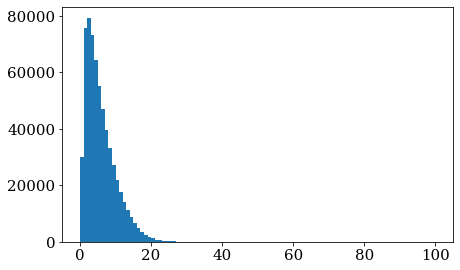

In [71]:
df = df_nu['CC_DIS'].query(q)
d = df.eval("JB_delta")
plt.hist(d,bins=100, range=(0, 100))
print(len(df.query("JB_delta==30 and "+ q))/len(df.query(q)))

In [119]:
ymin,ymax = .01,.9
q = f"JB_Q2>0"

for reaction in "CC_DIS", "NC_DIS", "Photoproduction":
    df = df_nu[reaction].query(q)
    n=len(df.query("MissingET_MET>15 and VAP/VP<0.35 and (VAP/VP<0.25 or MissingET_MET>20) and JB_delta<30"))
    d=len(df)
    print(n/d, n, d)
    

0.6885962037962038 430803 625625
0.0 0 471644
2.4773674785353802e-05 7 282558


(0.3095287491502969, 0.0, 4.00274)
0.07732921677408397


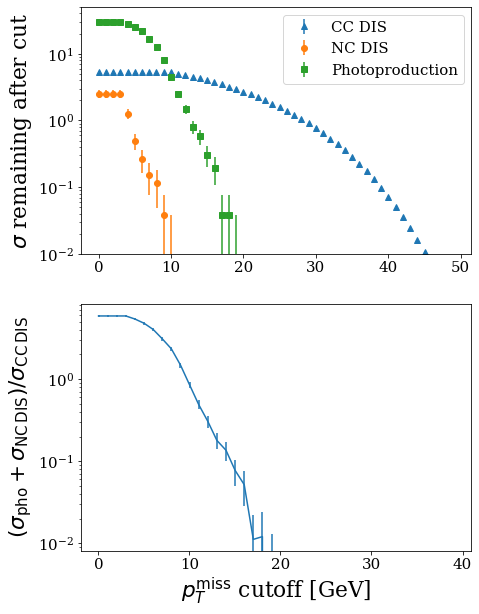

In [211]:
fig,axs= plt.subplots(2,1,figsize=(7,10))
plt.sca(axs[0])
ymin,ymax = .01,.9
#q = f"JB_Q2>0"
reactions = "CC_DIS", "NC_DIS", "Photoproduction"
markers='^os'
pbs=[14, 5.7e4, 5.8e4]
ys={}
dys={}
for i in range(3):
    reaction = reactions[i]
    df = df_nu[reaction]
    partitions = np.linspace(0, 50, 51)
    x=[]
    y=[]
    dy =[]
    shift=.01
    nprev = 1
    for mn, mx in zip(partitions[:-1], partitions[1:]):
        x.append(mn+i*shift)
        n=len(df.query(f"MissingET_MET>{mn} and VAP/VP<0.35 and JB_delta<30 and JB_Q2>100 and JB_y<0.9 and JB_y>0.01"))
        d=len(df)
        y.append(pbs[i]*n/max(d,1))
        if nprev >0:
            dy.append(pbs[i]*np.sqrt((max(n,1)*max(d-n,1))/max(d,1)**3))
        else :
            dy.append(0)
        nprev = n
    plt.errorbar(x,y, dy, linestyle='', marker=markers[i], label=reaction.replace("_", " "))
    ys[reaction]=pd.Series(y)
    dys[reaction]=pd.Series(dy)
plt.yscale('log')
plt.ylabel("$\sigma$ remaining after cut")
plt.ylim(1e-2)
plt.legend()
plt.sca(axs[1])
plt.errorbar(x[:40], ((ys['Photoproduction']+ys['NC_DIS'])/ys['CC_DIS'])[:40], (np.hypot(dys['Photoproduction'],dys['NC_DIS'])/ys['CC_DIS'])[:40])
plt.ylabel("$(\\sigma_{\\rm pho}+\\sigma_{\\rm NC\,DIS}) /\\sigma_{\\rm CC\,DIS}$")
plt.xlabel("$p^{\\rm miss}_T$ cutoff [GeV]")
plt.yscale('log')

thebin=15
print((ys['Photoproduction'][thebin],ys['NC_DIS'][thebin], ys['CC_DIS'][thebin]))
print((ys['Photoproduction'][thebin]+ys['NC_DIS'][thebin])/ys['CC_DIS'][thebin])

In [28]:


ymin,ymax = .01,.9
#q = f"JB_Q2>0"
reactions = "CC_DIS", "NC_DIS", "Photoproduction_hadd"
markers='^os'
pbs=[14, 5.7e4, 5.8e4]
y={}
dy={}
for i in range(3):
    reaction = reactions[i]
    df = df_nu[reaction]
    
    n=len(df.query(f"MissingET_MET>15 and VAP/VP<0.35 and JB_delta<30 and JB_Q2>100 and JB_y<0.9 and JB_y>0.01"))
    n=len(df.query(f"MissingET_MET>15 and VAP/VP<0.35 and JB_delta<30 and JB_Q2>100 and JB_y<0.9 and JB_y>0.01"))
    d=len(df)
    d2=len(df.query("JB_Q2>100 and JB_y<0.9 and JB_y>0.01"))
    print(n, d, n/d,n/d2,  np.sqrt(n)/d)
    y[reaction]= n/d*pbs[i]
    dy[reaction]= np.sqrt(n)/d*pbs[i]
print((y['Photoproduction_hadd'],y['NC_DIS'], y['CC_DIS']))
print("%.23f+-%.3f"%((y['Photoproduction_hadd']+y['NC_DIS'])/y['CC_DIS'], dy['Photoproduction_hadd']/y['CC_DIS']))



425843 1477705 0.28817862834598246 0.722468223430173 0.0004416080826078079
0 1496100 0.0 0.0 0.0
62 9979334 6.212839454015669e-06 0.009249589735939132 7.890313996917842e-07
(0.3603446883329088, 0.0, 4.034500796843754)
0.08931580546837701584106+-0.011


In [17]:
list(df_nu['Photoproduction_hadd'].columns)

['Jet_PT',
 'Jet_Eta',
 'Jet_Phi',
 'Jet_Mass',
 'Jet_DeltaEta',
 'Jet_DeltaPhi',
 'Jet_NCharged',
 'Jet_NNeutrals',
 'Jet_NeutralEnergyFraction',
 'Jet_ChargedEnergyFraction',
 'GenJet_PT',
 'GenJet_Eta',
 'GenJet_Phi',
 'GenJet_Mass',
 'GenJet_DeltaEta',
 'GenJet_DeltaPhi',
 'GenJet_NCharged',
 'GenJet_NNeutrals',
 'GenJet_NeutralEnergyFraction',
 'GenJet_ChargedEnergyFraction',
 'Neutrino_PID',
 'Neutrino_Status',
 'Neutrino_E',
 'Neutrino_Px',
 'Neutrino_Py',
 'Neutrino_Pz',
 'Neutrino_PT',
 'Neutrino_Eta',
 'Quark_PID',
 'Quark_Status',
 'Quark_E',
 'Quark_Px',
 'Quark_Py',
 'Quark_Pz',
 'Quark_PT',
 'Quark_Eta',
 'MissingET_MET',
 'MissingET_Eta',
 'MissingET_Phi',
 'GenMissingET_MET',
 'GenMissingET_Eta',
 'GenMissingET_Phi',
 'Event_Number',
 'Gen_W2',
 'Gen_x',
 'Gen_y',
 'Gen_Q2',
 'GenJet_size',
 'Hadron_PID',
 'Hadron_Charge',
 'Hadron_P',
 'Hadron_PT',
 'Hadron_Eta',
 'Hadron_Phi',
 'Hadron_E',
 'Hadron_ET',
 'Hadron_Eem',
 'Hadron_Ehad',
 'GenHadron_PID',
 'GenHadron_Char

In [29]:
import ROOT

Welcome to JupyROOT 6.27/01
